# Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = 'C:/Users/iryna/Documents/Data analytics/Career foundry/6. Advanced Analytics & Dashboard Design/09-2022 World Happiness Analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hap_full_categor.csv'))

In [5]:
df

,Unnamed: 0,country,region_id,region,Year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,happiness_category
0,0,Switzerland,WE,Western Europe,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,high
1,1,Iceland,WE,Western Europe,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,high
2,2,Denmark,WE,Western Europe,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,high
3,3,Norway,WE,Western Europe,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,high
4,4,Canada,NAANZ,North America and ANZ,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1224,Botswana,SSA,Sub-Saharan Africa,2022,141,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200,0.18700,low
1225,1225,Rwanda,SSA,Sub-Saharan Africa,2022,142,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700,0.53600,low
1226,1226,Zimbabwe,SSA,Sub-Saharan Africa,2022,143,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600,0.54800,low
1227,1227,Lebanon,MENA,Middle East and North Africa,2022,144,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200,0.21600,low


### 2. Data cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'country', 'region_id', 'region', 'Year',
       'happiness_rank', 'happiness_score', 'economy_GDP_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual', 'happiness_category'],
      dtype='object')

In [7]:
# Drop the redundant columns
df = df.drop(['Unnamed: 0'],axis = 1)

In [8]:
df.shape

(1229, 14)

In [9]:
# check for missing values
df.isnull().sum()

country                        0
region_id                      0
region                         0
Year                           0
happiness_rank                 0
happiness_score                0
economy_GDP_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
trust_government_corruption    0
generosity                     0
dystopia_residual              0
happiness_category             0
dtype: int64

In [10]:
# check for duplicates
dups = df.duplicated()

In [11]:
dups.shape

(1229,)

### Extreme value check

### Hypothesis
#### If a country life expectancy score is higher, then the country is more likely to have a higher happiness score

C:\Users\iryna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='health_life_expectancy', ylabel='Density'>

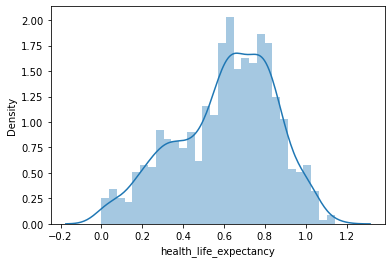

In [12]:
# extreme value check
sns.distplot(df['health_life_expectancy'], bins=30) # Shows extreme values

In [13]:
df['health_life_expectancy'].mean()#check for mean

0.6084670051749395

In [14]:
df['health_life_expectancy'].median() #check for median

0.63952

In [15]:
df['health_life_expectancy'].max() #check for max

1.141

In [16]:
df['health_life_expectancy'].min() #check for min

0.0

### 3. Data prep for regression analysis

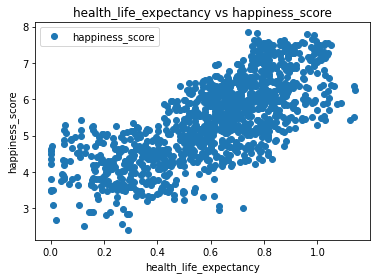

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'health_life_expectancy', y='happiness_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('health_life_expectancy vs happiness_score')  
plt.xlabel('health_life_expectancy')  
plt.ylabel('happiness_score')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['health_life_expectancy'].values.reshape(-1,1)
y = df['happiness_score'].values.reshape(-1,1)

In [19]:
X

array([[0.94143],
       [0.94784],
       [0.87464],
       ...,
       [0.27   ],
       [0.631  ],
       [0.289  ]])

In [20]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [2.995],
       [2.955],
       [2.404]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [22]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

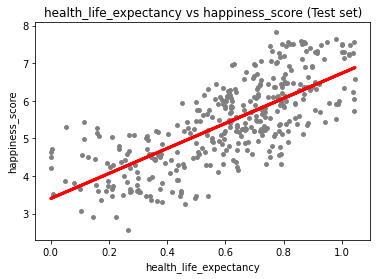

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('health_life_expectancy vs happiness_score (Test set)')
plot_test.xlabel('health_life_expectancy')
plot_test.ylabel('happiness_score')
plot_test.show()

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.3312843]]
Mean squared error:  0.577605354931912
R2 score:  0.5486323691092545


### Intepretation:
#### The slope is positive, so the relationship is positive. This aligns with the hypothesis that If a country life expectancy score is higher, then the country is more likely to have a higher happiness score. The MSE is at 0.5776, it means the model could not be accurate. R2 score of 0.55 represents a moderate fit.

In [28]:
y_predicted

array([[6.39099438],
       [5.7998474 ],
       [4.61821574],
       [4.64983202],
       [6.6666973 ],
       [6.19833869],
       [5.46932796],
       [5.60584399],
       [5.36938943],
       [5.88906978],
       [6.36580987],
       [6.87512993],
       [4.11339531],
       [6.04227548],
       [5.84003327],
       [6.87512993],
       [5.81245024],
       [6.66636689],
       [5.89240106],
       [5.26278833],
       [4.24674662],
       [6.02898372],
       [5.38943894],
       [4.5319439 ],
       [5.06291127],
       [5.98900831],
       [4.92109056],
       [6.73802562],
       [5.27278218],
       [5.37938328],
       [5.47932181],
       [6.0956094 ],
       [6.07229041],
       [4.84637779],
       [6.03042979],
       [5.24765696],
       [5.20948778],
       [5.91101818],
       [5.44671536],
       [6.33213059],
       [5.42602126],
       [6.04243115],
       [5.74805651],
       [6.19554793],
       [6.70560087],
       [3.78702938],
       [4.12210937],
       [4.503

In [29]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.9370,6.390994
1,6.4540,5.799847
2,3.3490,4.618216
3,4.5160,4.649832
4,5.5150,6.666697
5,5.9252,6.198339
6,5.7110,5.469328
7,5.8780,5.605844
8,4.5960,5.369389
9,6.4360,5.889070


### Compare how the regression fits the training set

In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.3312843]]
Mean squared error:  0.5884867617272092
R2 score:  0.5205547065147285


#### The values are identical to the model. Positive relationship, MSE 0.59 and a modertae R2. The model is not overfitted. This all indicates that the life expectancy is correlated positively with the happiness score. However, there are other variances in the data that would be considered in determining the happiness score.

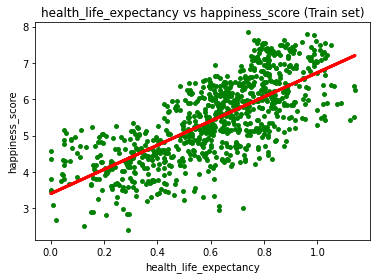

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('health_life_expectancy vs happiness_score (Train set)')
plot_test.xlabel('health_life_expectancy')
plot_test.ylabel('happiness_score')
plot_test.show()